In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [ ]:
# Function to detect noise using Z-score
def noise(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold

# Detect noise using Z-score
noise_df = noise(df)

print("Noise Detection using Z-score:")
print(noise_df)

Noise Detection using Z-score:
         age  capital-gain  capital-loss  education  education-num  fnlwgt  \
0      False         False         False      False          False   False   
1      False         False         False      False          False   False   
2      False         False         False      False          False   False   
3      False         False         False      False          False   False   
4      False         False         False      False          False   False   
...      ...           ...           ...        ...            ...     ...   
32556  False         False         False      False          False   False   
32557  False         False         False      False          False   False   
32558  False         False         False      False          False   False   
32559  False         False         False      False          False   False   
32560  False         False         False      False          False   False   

       hours-per-week  marital-s

<ipython-input-52-a8b859c4be7e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-52-a8b859c4be7e>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


In [ ]:
#Drop redundant features
df.drop('fnlwgt', axis=1, inplace=True)

In [ ]:
df.drop('capital-gain', axis=1, inplace=True)

In [ ]:
df.drop('capital-loss', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32418 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32418 non-null  int64 
 1   workclass       32418 non-null  object
 2   education       32418 non-null  object
 3   education-num   32418 non-null  int64 
 4   marital-status  32418 non-null  object
 5   occupation      32418 non-null  object
 6   relationship    32418 non-null  object
 7   race            32418 non-null  object
 8   sex             32418 non-null  object
 9   hours-per-week  32418 non-null  int64 
 10  native-country  32418 non-null  object
 11  salary          32418 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


<ipython-input-59-c15518aca9a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

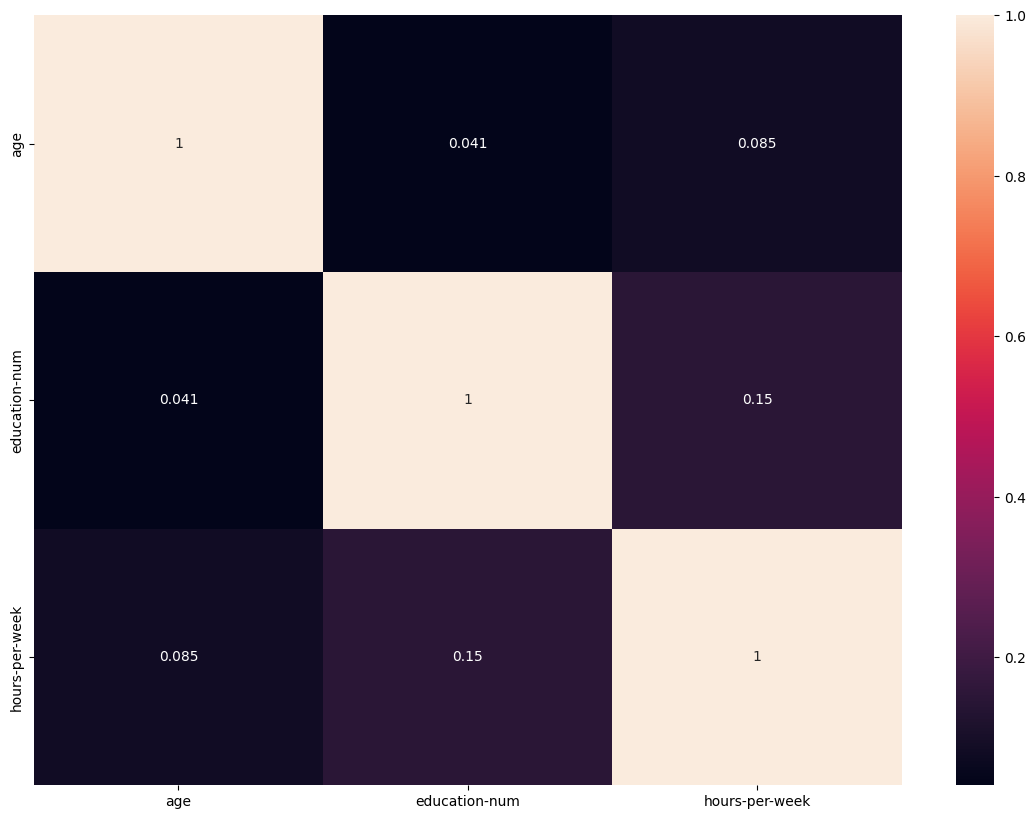

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df.corr(), annot = True)

#collectiondata.corr()

<ipython-input-60-75ebf85db048>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


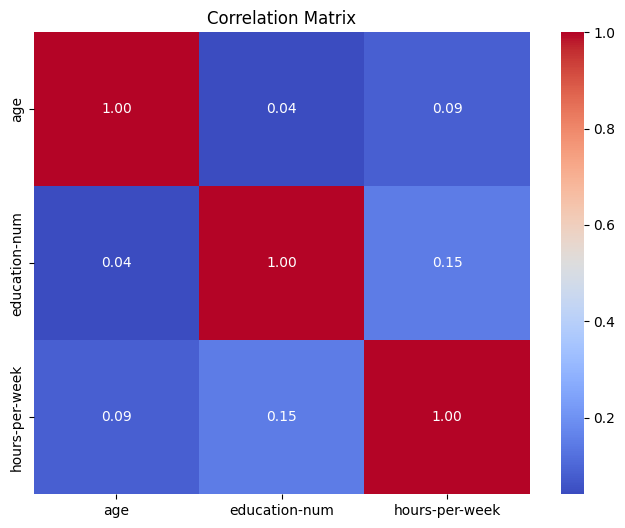

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-61-1a6493301a25>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


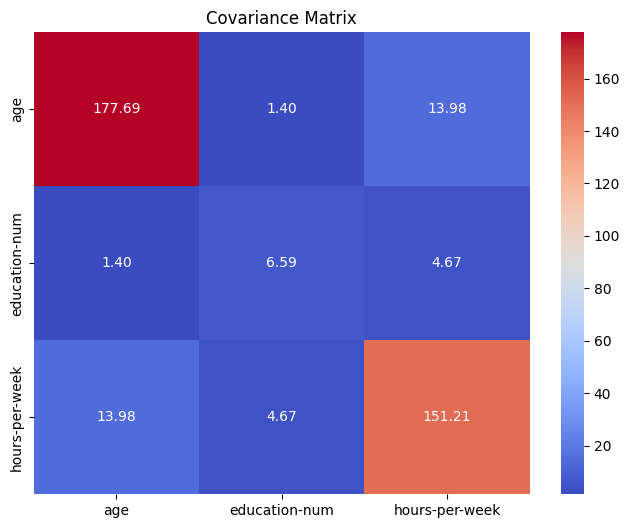

In [ ]:
# Calculate covariance matrix
covariance_matrix = df.cov()

# Visualize covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

**Question 1)**

In [ ]:
# Count the number of mem and women
gender = df['sex'].value_counts()

print("Gender Counts:")
print(gender)

Gender Counts:
Male      21690
Female    10728
Name: sex, dtype: int64


**Question 2)**

In [ ]:
females = df[df['sex'] == 'Female']
avrAge = females['age'].mean()
print('Average age of females:', avrAge)

Average age of females: 36.66797166293811


**Question 3)**

In [ ]:
usa = df[df['native-country'] == 'United-States'].count()
print('Citizens of the United-States are',usa)

Citizens of the United-States are age               29043
workclass         29043
education         29043
education-num     29043
marital-status    29043
occupation        29043
relationship      29043
race              29043
sex               29043
hours-per-week    29043
native-country    29043
salary            29043
dtype: int64


**Question 4)**

In [ ]:
salary = df[df['salary'] == '<=50K']
LesserMeanAge = salary['age'].mean()
LesserSTDage = salary['age'].std()
print("Mean value of age of those who have salary <= 50K per year is",LesserMeanAge)
print("Standard Deviation of age of those who have salary <= 50K per year is",LesserSTDage)

print()

salary = df[df['salary'] == '>50K']
HigherMeanAge = salary['age'].mean()
HigherSTDAge = salary['age'].std()
print("Mean value of the age of those who have salary > 50K per year is",HigherMeanAge)
print("Standard Deviation of the age of those who have salary > 50K per year is",HigherSTDAge)

Mean value of age of those who have salary <= 50K per year is 36.55702788391188
Standard Deviation of age of those who have salary <= 50K per year is 13.66197595531973

Mean value of the age of those who have salary > 50K per year is 44.12474411463664
Standard Deviation of the age of those who have salary > 50K per year is 10.296744756944529


**Question 5)**

In [ ]:
Education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

salary = df[df['salary'] == '>50K']
high_salary = salary['education'].isin(Education).any()

if high_salary:
    print('Yes')
else:
    print('No')

Yes


**Question 6)**

In [ ]:
groupedData = df.groupby(['race', 'sex'])['age'].describe()

print('Statistics of age for each race and gender:')
print(groupedData)

AmerIndianEskimo = df[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male')]['age'].max()
print('Maximum age of men in Amer-Indian-Eskimo race is', AmerIndianEskimo)

Statistics of age for each race and gender:
                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    118.0  36.754237  12.554794  17.0  27.0  35.5   
                   Male      191.0  36.973822  11.633633  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      688.0  38.703488  12.173390  18.0  29.0  37.0   
Black              Female   1551.0  37.732431  12.421520  17.0  28.0  37.0   
                   Male     1566.0  37.586207  12.704402  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8604.0  36.601581  14.004118  17.0  25.0  34.0   
                   Male    19083.0  39.444375  13.121560  17.0  29.0  38.0   

                   

**Question 7)**

In [ ]:
def MaritalStatus(status):
    if status.startswith('Married'):
        return 'Married'
    else:
        return 'Single'

df['marital_category'] = df['marital-status'].apply(MaritalStatus)

Earning = df[df['salary'] == '>50K'].groupby('marital_category')['salary'].count() / df.groupby('marital_category')['salary'].count()

print('Proportion of individuals earning >50K in each category:')
print(Earning)

higher_proportion = Earning.idxmax()

print('The proportion of those earning >50K is higher among the ones who are', higher_proportion)

Proportion of individuals earning >50K in each category:
marital_category
Married    0.437545
Single     0.064495
Name: salary, dtype: float64
The proportion of those earning >50K is higher among the ones who are Married


**Question 9)**

In [ ]:
avg = df.groupby(['native-country', 'salary'])['hours-per-week'].mean()
print(avg)

native-country  salary
?               <=50K     40.255760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     38.283951
                            ...    
United-States   >50K      45.536224
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64
